The percolation process is a standard model for a random medium. Such a process possesses a singularity about which it is hard to prove much rigorous mathematics. Instead, we shall explore such a singularity by numerical methods.

Take as a directed graph $G$ the first quadrant of the square lattice, with northerly and easterly orientations. The vertices are the points $x = (x_1, x_2)$ with $x_1, x_2 \in \{0, 1, 2, \dots\}$. We set
\begin{equation}
    |x - y| = |x_1 - y_1| + |x_2 - y_2|
\end{equation}
for two such $x$, $y$ and we join $x$ to $y$ by an edge $\langle x, y \rangle$ if $|x-y| = 1$. This edge is directed upwards or rightwards as appropriate.

Let $p \in [0, 1]$. Each edge of $G$ is designated open with probability $p$, different edges having independent designations. Edges not designated open are called closed. Water is supplied at the origin $(0,0)$, and is allowed to flow along open edges in the directions given.

The problem is to study the geometry of the random set $C$ containing all wetted points. In particular, for what values of $p$ is there strictly positive probability that $C$ is infinite.

Writing $P_p$ for the probability function when $p$ is the parameter given above, we define $\theta(p) = P_p(|C| = \infty)$. It may be shown that $\theta$ is a non-decreasing function, and the critical probability
is defined by
\begin{equation}
    p_c = \sup\{p : \theta(p) = 0\}.
\end{equation}
It may be shown that $0 < p_c < 1$ (and better bounds are known), but the true value of $p_c$ is unknown.

One method for estimating $\theta(p)$ is as follows. Let $Q_n$ be the set of all points $x = (x_1, x_2)$ with $x_1 + x_2 = n$. Define the sequence $C_0, C_1, C_2, \dots$ of sets in the following inductive manner. First, $C_0 = \{(0, 0)\}$. Having found $C_0, C_1, \dots, C_K$, we next define $C_{K+1}$. For $y = (y_1, y_2) \in Q_{K+1}$, we place $y$ in $_{K+1}$ if and only if
\begin{align}
    \text{either: } y' = (y_1 - 1, y_2) \in C_K, \text{ and } \langle y', y \rangle \text{ is open}, \\
    \text{and/or: } y'' = (y_1, y_2 - 1) \in C_K, \text{ and } \langle y'', y \rangle \text{ is open}.
\end{align}
By generating pseudo-random numbers, we may obtain a realisation of the model, and an associated sequence $C_0, C_1, \dots$; for each such realisation, define $I_n$ to be $0$ or $1$ depending on whether $C_n$ is empty or non-empty (respectively). If $I_n(1), I_n(2), \dots, I_n(m)$ are the values of $I_n$ obtained in m independent realizations of the model, then
\begin{equation}
    \hat{\theta}_{m,n}(p) = \frac{1}{m}\sum_{j=1}^m I_n(j)
\end{equation}
may be used to estimate $\theta_n(p) = P_p(C_n \neq \emptyset)$. If $n$ is sufficiently large, then $\hat{\theta}_{m,n}(p)$ may be used to estimate $\theta(p) = \lim_{n \to \infty} \theta_n(p)$.


---

To show that $\theta$ is non-decreasing in $p$, we utilise a coupling argument. A fixed random variable $R_e \sim U[0,1]$ is assigned to every edge $e$ in the lattice. An edge is defined as open for $p$ if and only if $R_e \le p$. Consider two parameters $0 \leq p_1 \leq p_2 \leq 1$. If an edge $e$ is open at level $p_1$, then $R_e \leq p_1$, hence $R_e \le p_2$. Therefore, the edge $e$ is also open at level $p_2$. Consequently, $C(p_1) \subset C(p_2)$. Finally, if the cluster is infinite for $p_1$, then it must also be infinite for $p_2$.

To show that $\theta$ is non-decreasing in $n$, recall that $\theta_n(p) = P_p(C_n \neq \emptyset)$ is the probability that the set of wetted points on the $n$-th diagonal $C_n$ is non-empty. If the water fails to reach diagonal $n$, then it is impossible for the water to reach diagonal $n+1$. Therefore, $\{C_{n+1} \neq \emptyset\} \subset \{C_n \neq \emptyset\}$ and $P_p(C_{n+1} \neq \emptyset) \leq P_p(C_n \neq \emptyset)$.

---

The estimator $\hat{\theta}_{m,n}(p)$ is calculated by averaging $m$ independent indicator variables $I_n(j)$. This is a multiple Bernoulli trial setup or a Binomial distribution scaled by $1/m$.
*   The true mean is $\mu = \theta_n(p)$.
*   The variance of a single indicator is $\sigma^2 = \theta_n(p)(1 - \theta_n(p))$.
*   The variance of the sample mean $\hat{\theta}_{m,n}$ is $\frac{\sigma^2}{m}$.

The size of the error is best estimated by the standard error of the mean
\begin{equation}
    SE \approx \sqrt{\frac{\theta_n(p)(1 - \theta_n(p))}{m}}.
\end{equation}
Since $\theta_n(p)(1 - \theta_n(p))$ has a maximum value of $1/4$ when $\theta = 1/2$, the magnitude of the error is bounded by
\begin{equation}
    |\hat{\theta}_{m,n}(p) - \theta_n(p)| \lesssim \frac{1}{2\sqrt{m}}
\end{equation}
This indicates that the error decreases in proportion to the square root of the number of realisations or $1/\sqrt{m}$.

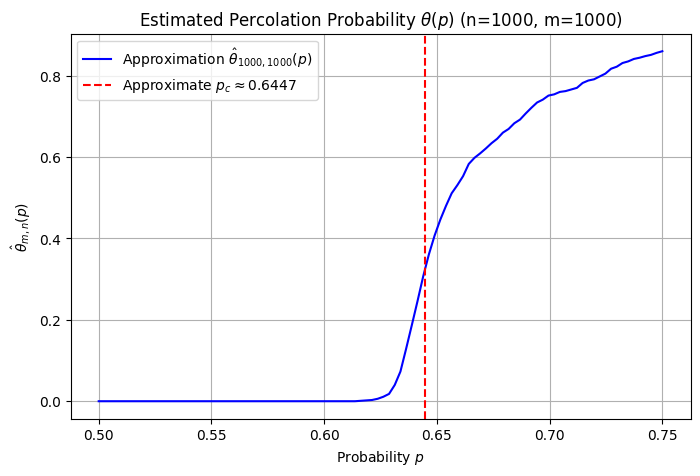

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_percolation_coupling(n, m):
    '''
    Simulates directed bond percolation using the coupling method (Z-values).
    n: number of steps (diagonals)
    m: number of independent realisations
    Returns: A sorted array of critical p-thresholds for the m realisations.
    '''
    # Initialise diagonal 0 (the origin) with Z=0 for all m realisations.
    Z = np.zeros((m, 1))

    # Iterate through diagonals from 1 to n
    for step in range(n):
        current_width = step + 1
        next_width = step + 2

        Z_next = np.full((m, next_width), 1.1) # Infinity

        # Down/up, connect index i on diag step to index i on diag step+1
        R_down = np.random.rand(m, current_width)
        cost_down = np.maximum(Z, R_down)
        Z_next[:, 0:current_width] = np.minimum(Z_next[:, 0:current_width], cost_down)

        # Right/left, connect index i on diag step to index i+1 on diag step+1
        R_right = np.random.rand(m, current_width)
        cost_right = np.maximum(Z, R_right)
        Z_next[:, 1:next_width] = np.minimum(Z_next[:, 1:next_width], cost_right)

        Z = Z_next

    # For each realisation, the cluster survives at level p if min(Z) <= p.
    thresholds = np.min(Z, axis=1)
    return np.sort(thresholds)

n_sim = 1000
m_sim = 1000
thresholds = simulate_percolation_coupling(n_sim, m_sim)
p_values = np.linspace(0.5, 0.75, 100)
theta_estimates = []

for p in p_values:
    count = np.sum(thresholds <= p)
    theta_estimates.append(count / m_sim)

plt.figure(figsize=(8, 5))
plt.plot(p_values, theta_estimates, label=f'Approximation $\\hat{{\\theta}}_{{{m_sim},{n_sim}}}(p)$', color='blue')
plt.axvline(x=0.6447, color='red', linestyle='--', label='Approximate $p_c \\approx 0.6447$')
plt.title(f'Estimated Percolation Probability $\\theta(p)$ (n={n_sim}, m={m_sim})')
plt.xlabel('Probability $p$')
plt.ylabel('$\\hat{\\theta}_{m,n}(p)$')
plt.legend()
plt.grid(True)
plt.show()

The plotted curve starts near 0 at $p=0.5$ and remains very low until about $p=0.62$. It then rises sharply, passing through the critical value region $p_c \approx 0.644$, where the growth slows as $p$ approaches $0.75$.

*   We established that $\theta_n(p)$ is a decreasing sequence in $n$. Since our simulation uses a finite $n$ rather than infinity, our probability estimate includes clusters that currently survive but may die out later. Therefore, the simulated graph is an upper bound for the true curve
\begin{equation}
    \theta_{true}(p) \le \hat{\theta}_{m,n}(p).
\end{equation}

*   In the sub-critical region $p < p_c$, the true probability $\theta(p)$ is exactly $0$. However, our graph shows a small tail to the left due to the finite clusters that are larger than the grid depth $n$. As $n \to \infty$, this tail would vanish and the curve would become flat at $0$ up to $p_c$.

*   At the critical point $p \approx p_c$, the true function $\theta(p)$ is non-analytic as it peels away from a constant zero function. Our simulated graph is smooth (sigmoidal).

For fixed $n$ and $m$, an estimate of $p_c$ may be obtained by finding $\sup\{p : \hat\theta_{m,n}(p) = 0\}$. Denote this estimate by $\hat{p}_c = \hat{p}_c(m, n)$.

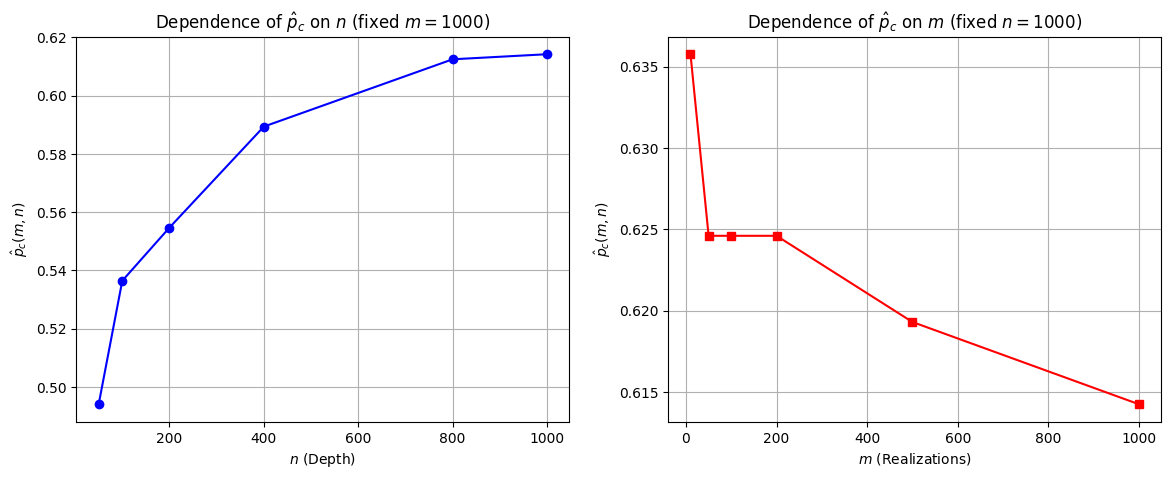

In [7]:
def investigate_pc_estimator(n_max, m_max, checkpoints):
    '''
    Simulates percolation to investigate dependence of pc estimator on n and m.
    Returns a dictionary of thresholds at specified n checkpoints.
    '''
    # Initialise Z for m realisations (cost to reach origin is 0)
    Z = np.zeros((m_max, 1))

    thresholds_at_checkpoints = {}
    check_set = set(checkpoints)

    for step in range(n_max):
        current_n = step + 1

        current_width = step + 1
        next_width = step + 2

        Z_next = np.full((m_max, next_width), 1.1) # Infinity

        # Generate random numbers
        R_down = np.random.rand(m_max, current_width)
        R_right = np.random.rand(m_max, current_width)

        # Calculate costs
        cost_down = np.maximum(Z, R_down)
        cost_right = np.maximum(Z, R_right)

        Z_next[:, 0:current_width] = np.minimum(Z_next[:, 0:current_width], cost_down)
        Z_next[:, 1:next_width] = np.minimum(Z_next[:, 1:next_width], cost_right)

        Z = Z_next

        if current_n in check_set:
            # The threshold for a realisation is the minimum Z on the current diagonal
            thresholds_at_checkpoints[current_n] = np.min(Z, axis=1)

    return thresholds_at_checkpoints

n_max = 1000
m_max = 1000
n_checkpoints = [50, 100, 200, 400, 800, 1000]

data = investigate_pc_estimator(n_max, m_max, n_checkpoints)

# Dependence on n (with fixed m = m_max)
est_vs_n = []
for n in n_checkpoints:
    # Estimator is the minimum of the thresholds
    pc_est = np.min(data[n])
    est_vs_n.append(pc_est)

# Dependence on m (with fixed n = n_max)
# We use the data from the final step
final_thresholds = data[n_max]
m_values = [10, 50, 100, 200, 500, 1000]
est_vs_m = []

for m in m_values:
    # Take first m realizations
    subset = final_thresholds[:m]
    pc_est = np.min(subset)
    est_vs_m.append(pc_est)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(n_checkpoints, est_vs_n, 'o-', color='b')
ax1.set_title(f'Dependence of $\\hat{{p}}_c$ on $n$ (fixed $m={m_max}$)')
ax1.set_xlabel('$n$ (Depth)')
ax1.set_ylabel('$\\hat{p}_c(m,n)$')
ax1.grid(True)

ax2.plot(m_values, est_vs_m, 's-', color='r')
ax2.set_title(f'Dependence of $\\hat{{p}}_c$ on $m$ (fixed $n={n_max}$)')
ax2.set_xlabel('$m$ (Realizations)')
ax2.set_ylabel('$\\hat{p}_c(m,n)$')
ax2.grid(True)

plt.show()

The estimate $\hat{p}_c(m, n)$ is increasing with $n$. For small $n$, the estimate is significantly lower. As $n$ increases, the estimate rises, asymptotically approaching the true critical value.

The estimator $\hat{p}_c$ corresponds to the realisation that managed to survive to depth $n$ with the lowest possible $p$. For a specific realization to survive to depth $n$, it must necessarily have survived to depth $n-1$. Thus, the estimator is monotonically increasing in $n$.

The estimate $\hat{p}_c(m, n)$ is decreasing with $m$. With a small sample size, the estimate might be relatively high (close to the average threshold). As $m$ increases, the estimate drops. Because we are taking the minimum of a set of random variables, adding more samples can only decrease the result.

By increasing $m$, we are increasing the probability of finding a realisation at the tail that manages to percolate to depth $n$. As $m \to \infty$, this estimator tends toward the theoretical minimum $p$ required for any path of length $n$ to exist, making it a biased estimator if $m$ becomes too large relative to $n$.